# Time Series Analysis and Forecasting using Decomposition 

In this notebook, we demonstrate the concepts of trend, seasonality, and stationarity of time series through a decomposition-based approach. We use these same concepts to show that they can be useful for time series forecasting. 

## Dataset

The dataset used in this analysis is the ["Individual household electric power consumption Data Set"](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption), retrieved from the UCI Machine Learning Repository. The dataset is a collection of measurements of electrical power consumption for a single household, sampled every minute between December 2006 and November 2010 (47 months). 

The following descriptions of the 9 attributes in the dataset are taken directly from the UCI Learning Repository:

1. **date**: Date in format dd/mm/yyyy 
2. **time**: time in format hh:mm:ss 
3. **global_active_power**: household global minute-averaged active power (in kilowatt) 
4. **global_reactive_power**: household global minute-averaged reactive power (in kilowatt) 
5. **voltage**: minute-averaged voltage (in volt) 
6. **global_intensity**: household global minute-averaged current intensity (in ampere) 
7. **sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
8. **sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
9. **sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

Note that in this notebook, we will only focus on one attribute, the "Global active power", as the purpose is to demonstrate different time series analysis and forecasting methods. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import itertools
import calendar
import os 

# Set directories and check for existence
wdir = os.path.abspath('D:\Data Science Projects')
assert os.path.exists(wdir) == True

fname = 'household_power_consumption.txt'
data = pd.read_csv(os.path.join(wdir,'data',fname), sep = ';',
                   low_memory = False, na_values =['?'],
                   parse_dates = {'DT':['Date','Time']},
                   infer_datetime_format = True, index_col = 'DT')

In [3]:
data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [4]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


The data uses '?' to denote missing values. At the time of loading, we can directly replace these values with NaN values. We also merge the date and time columns into a single column 'DT' in which we set as the index for the DataFrame. 

## Data cleanup

Here, we replace each NaN value with the mean for each attribute and quickly check that there are no longer any NaN / null values. 

In [5]:
# Replace NaN with mean 
data = data.fillna(data.mean())

# Check number of null values
data.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# Exploratory Data Analysis 

Here, we will focus first see how the power consumption varies with time by resampling the data from one-minute intervals to daily intervals. This involves binning the measurements into day-specified batches and then taking the mean of each batch. 

In the following plot, we plot both the daily and month average to show daily and monthly variations in the usage of electricity. 

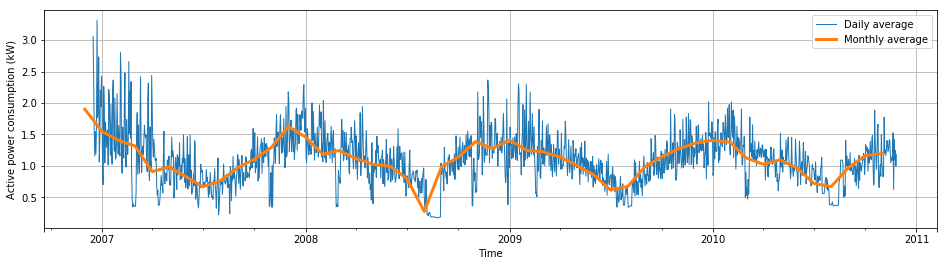

In [6]:
# Daily average active power consumption
plt.figure(figsize = (16,4))
data.Global_active_power.resample('D').mean().plot(grid = True, linewidth = 1)

# Monthly average active power consumption
ax = data.Global_active_power.resample('M').mean().plot(grid = True,
                                      linewidth = 3)
plt.xlabel('Time')
plt.ylabel('Active power consumption (kW)')
ax.legend(['Daily average','Monthly average'])
plt.show()

We can clearly see daily fluctuations in the power consumption as well as month to month variations as well. Seasonal variations are quite apparent in this plot, showing that power consumption falls towards a minimum during the warm summer months and increases to a maximum during the cold winter season. 

## Bar plots

In this section, we will try to break down the average power consumption for individual months, days, and hours to see if we can spot any other time dependencies in the power consumption. 

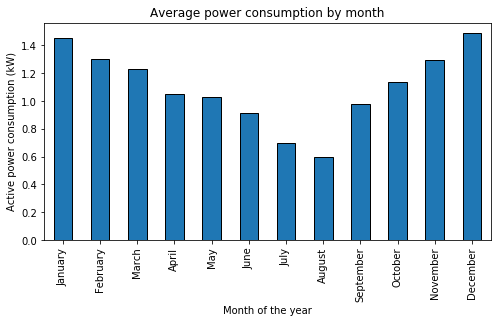

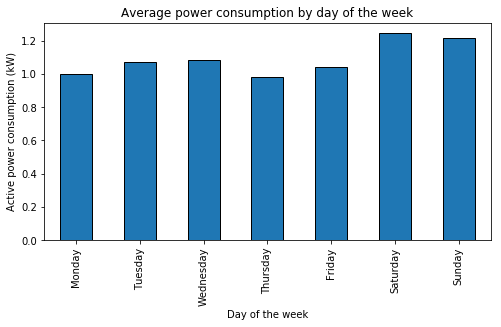

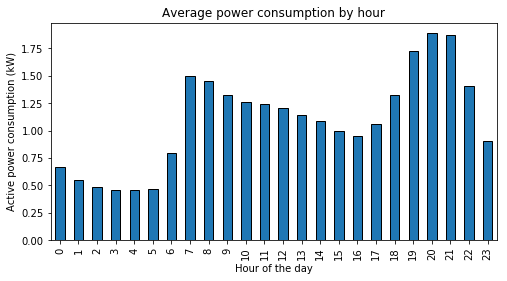

In [7]:
# Average power consumption over month
ax = data.groupby(data.index.month).mean().Global_active_power.plot(
        kind = 'bar', color = 'C0', figsize = (8,4), ec = 'black')
ax.set_xticklabels(calendar.month_name[1:13])
plt.xlabel('Month of the year')
plt.ylabel('Active power consumption (kW)')
plt.title('Average power consumption by month')
plt.show()

# Average power consumption over day
ax = data.groupby(data.index.dayofweek).mean().Global_active_power.plot(
        kind = 'bar', color = 'C0', figsize = (8,4), ec = 'black')
ax.set_xticklabels(calendar.day_name[0:7])
plt.xlabel('Day of the week')
plt.ylabel('Active power consumption (kW)')
plt.title('Average power consumption by day of the week')
plt.show()

# Average power consumption over hour of the day 
ax = data.groupby(data.index.hour).mean().Global_active_power.plot(
        kind = 'bar', color = 'C0', figsize = (8,4), ec = 'black')
plt.xlabel('Hour of the day')
plt.ylabel('Active power consumption (kW)')
plt.title('Average power consumption by hour')
plt.show()

From the first figure above, we find more evidence showing that power consumption is greatest during the winter months of November to March, and drops down to a minimum for the month of August. 

Similarly, if we examine the attribute sorted by day of the week, we notice that the weekend days of Saturday and Sunday show the greatest usage of electricity. And again, if broken down by hour of the day, we see that there are two distinct usage peaks within a 24-hour period. One peak in the morning at 7 AM when the individual starts to get ready for the day and falls to a moderate low at 2 PM. Beginnning at 3 PM, electricity usage slowly ramps up as the individual comes home from work and starts the preparation for dinner. 

## Fourier (spectrum) analysis 

As we saw from our initial analysis, we saw that the time series had several cyclical components ranging from year long seasonal periods as well as shorter weekly and hourly cycles. A useful, and more quantitative way of identifying these cycles is to use Fourier analysis. 

In this method, the time series can be broken down frequency components, which are correlated to periods of cyclicity. In the following, we plot what is known as the amplitude spectrum. This plot tells us which frequency components are most significant within the data set. 

The time series, which exists in the time domain, is Fourier transformed into the frequency domain. The transformed data, which is comprised of complex values, are then converted to amplitudes by taking its absolute value. This is then plotted with respect to frequency from 0 to the Nyquist frequency. 

Note that since I like to work in SI units, the time interval is set as 60 seconds (1 minute).

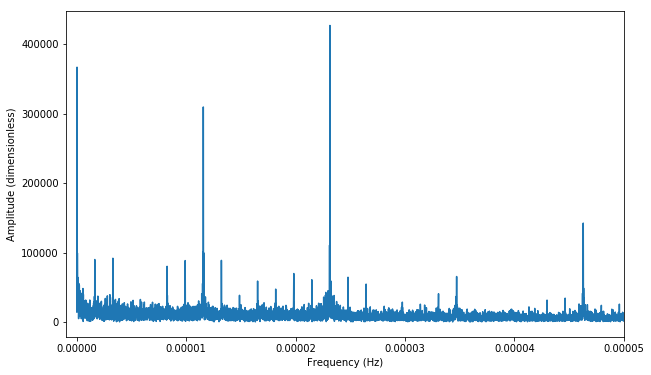

In [8]:
# Amplitude spectrum 
n = data.shape[0]
delt_t = 60

yf = np.abs(np.fft.fft(data.Global_active_power))
xf = np.linspace(0, 1/(2*delt_t), int(n/2))

plt.figure(figsize = (10,6))
plt.plot(xf, yf[1:int(n/2)+1])
plt.xlim([-1e-6,5e-5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dimensionless)')
plt.show()

In order to identify the cycles in our time series, we will need to detect the most significant peaks in the amplitude spectrum. Here, we use the PeaksUtils package which is helpful with the detection of peaks in 1-dimensional data. After detecting the peaks, we convert their corresponding frequencies to periods displayed in units of *days*.

The algorithm finds seasonal periods of 360 days, 3.5 days, 1 day, 1/2 day, and 1/4 day. These values are consistent with the findings from direct analysis of the plots. 

In [9]:
import peakutils

# Identification of peaks
ind = peakutils.indexes(yf[0:int(n/2)],thres = 0.04, min_dist = 20)

# in days
sig_peaks = 1/xf[ind]

np.set_printoptions(precision = 3, formatter={'float_kind':'{:f}'.format})
print(sig_peaks/60/60/24)

[360.287500 3.497937 1.000104 0.500052 0.249983]


## Stationarity 

An important assumption for many time series methods is that is stationary. A time series that is stationary is one whose statistical properties such as the mean and variance are constant over time. 

We can visually check if our time series is stationary by plotting its mean and variance as a function of time by using a rolling window. But first, let's break our time series up into training and validation sets as we will later try to use this same dataset for forecasting. 

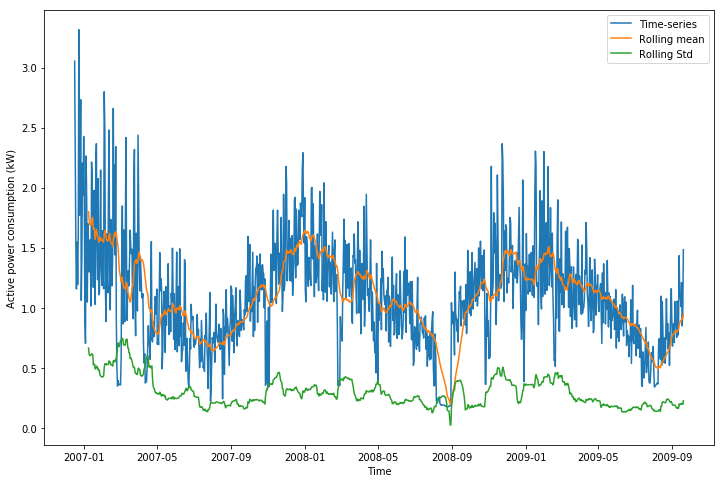

In [10]:
active_ts = data.Global_active_power.resample('D').mean()

# Split into training and validation datasets
val_frac = int(active_ts.shape[0]*0.7)
ts_train = active_ts[:val_frac]
ts_val = active_ts[val_frac: - 100]

# Rolling statistics 
plt.figure(figsize = (12,8))
ax1 = plt.plot(ts_train, label = 'Time-series')
ax2 = plt.plot(ts_train.rolling(window = 24).mean(), label = 'Rolling mean')
ax3 = plt.plot(ts_train.rolling(window = 24).std(), label = 'Rolling Std')
plt.xlabel('Time')
plt.ylabel('Active power consumption (kW)')
plt.legend(loc = 'best')
plt.show()

As we can see from the above figure, the mean and variance vary significantly with time, hence the time series is not stationary. This is typically due to a significant trend or seasonality components embedded within the time series. 

Another way of checking for stationarity is by using an Augmented Dickey-Fuller test. This is a statistcal method where the null hypothesis for this test is that the time series has a unit root, that is, it has some kind of time-dependent structure. In the cell below, we create a user-defined function that will print out the results of the Augmented Dickey-Fuller test, which can be obtained from the Statsmodels package. 

In [11]:
# Augmented Dickey-Fuller test
def adf_test(timeseries):
    
    from statsmodels.tsa.stattools import adfuller
    
    adf_obj = adfuller(timeseries)
    adf_result = pd.Series(adf_obj[0:4], index = ['Test Statistic', 'p-value',
                      '# of sample lags', 'Number of Observations'])
                      
    for i,j in adf_obj[4].items():
        adf_result['Critical Value (%s)' % i] = j
    
    print(adf_result)
    
adf_test(ts_train)

Test Statistic             -3.005542
p-value                     0.034380
# of sample lags           21.000000
Number of Observations    987.000000
Critical Value (1%)        -3.436993
Critical Value (5%)        -2.864473
Critical Value (10%)       -2.568332
dtype: float64


The test statistic for this time series is given as the first value. By comparison of this value with the critical values, we see that this time series is mostly stationary as the test value falls inbetween the 1% and 5% critical value. We can also look at the p-value for this test, and with a significance level of 0.05, we can thus reject the null hypothesis that this time series is non-stationary. 

However, we do notice that there is a clear seasonality in the time series. Let's see if we can get this value down even further by removing the seasonal component. To do this, we will use a decomposition-based approach. 

## Decomposition 

Any time series can be described as a function of several components, most commonly:

1. Trend T(t), which reflects the general progression of the time series over a long period of time
2. Seasonality S(t), referring to a periodic pattern that repeats itself over a fixed time interval
3. Random R(t), which is a irregular stochastic component that represents the residuals of the time series after the first two components are removed 

In decomposition-based methods, time series are broken down into these components for ease of interpretation. In addition, a non-stationary time series can be converted to a stationary one by removal of the seasonal and trend components. This is important as many analysis methods inherently assume that the input time series is stationary. 

In the example below, we can break down the times series Y(t) into the 3 components using an additive model of the form:

\begin{equation*}
Y(t) = T(t) + S(t) + R(t)
\end{equation*}

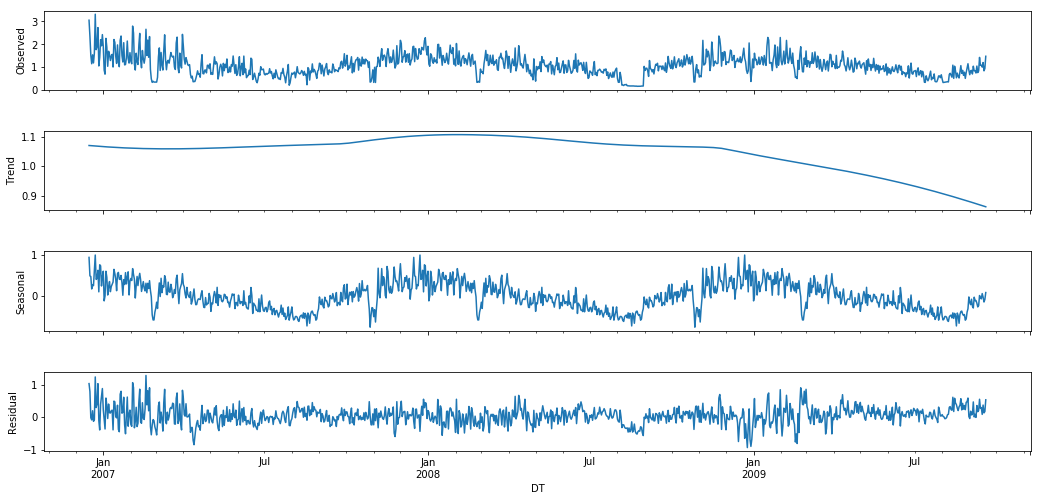

In [13]:
import stldecompose 
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

stl = stldecompose.decompose(ts_train, period = 365)

stl_detrend = ts_train - stl.seasonal - stl.trend

ax = stl.plot()
ax.set_figheight(8)
ax.set_figwidth(16)
plt.show()

Note that our time series has multiple seasonal components, however, this model chooses to extract the seasonality responsible for the largest changes in electrical power consumption: the yearly (365 days/samples) component. 

By interpretation of the plot, we can see that the trend is relatively constant over time until around mid 2008 when it starts to slowly decrease. The seasonal component is consistent with expectations, however we notice that within the cyclical ups and downs of the winter and summer months, large decreases in power consumption is observed during the months of November and March. These sudden decreases in power consumption may be associated with maintenence schedules, but also may be a product of the decomposition method itself due to the sparse amount of data (our training data only contains 2.5 seasonal periods). 

After removing the seasonal and trend components from the time series, we can repeat our Augmented Dickey-Fuller test for stationarity. 

In [15]:
adf_test(stl_detrend)

Test Statistic             -5.039255
p-value                     0.000019
# of sample lags           21.000000
Number of Observations    987.000000
Critical Value (1%)        -3.436993
Critical Value (5%)        -2.864473
Critical Value (10%)       -2.568332
dtype: float64


The results show the test statistic at -5.04, which is much lower than the 1% critical value, corresponding to a pvalue of less than 0.0001. This gives us confidence that our time series is now indeed stationary. 

## Forecasting with decomposition 

Even though decomposition methods are typically used as an analysis step prior to implementing modelling techniques such as ARIMA, they can also be used as a robust forecasting method itself.

In the code below, we use the an  Loess-based decomposition technique to decompose and forecast values. 

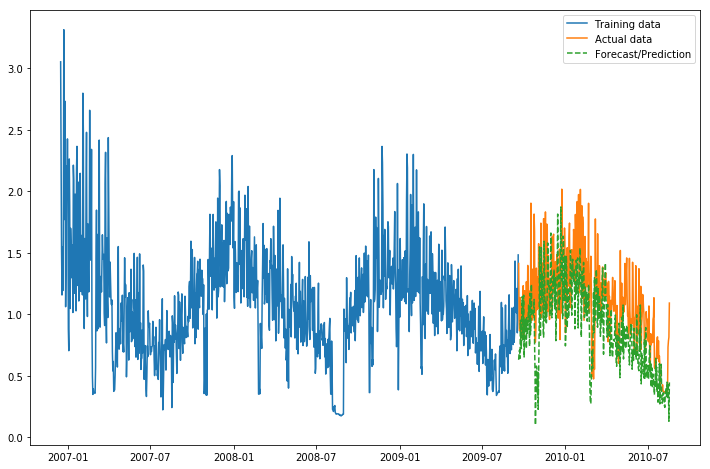

In [20]:
fcast = stldecompose.forecast(stl, steps = len(ts_val), 
                              fc_func = seasonal_naive, seasonal = True)

plt.figure(figsize = (12,8))
plt.plot(ts_train, '-', label = 'Training data')
plt.plot(ts_val, '-', label = 'Actual data')
plt.plot(fcast, '--', label = 'Forecast/Prediction')
plt.legend(loc = 'best')
plt.show()

As we can see, the STL decomposition forecasting does a relatively good job at predicting the validation dataset. The predicted values are slightly lower than the actual values due to the decreasing trend that was extracted by the decomposition. Seasonality is strongly reflected in the forecasted values, even to the point of preedicting the large drop in power consumption in March 2010. This gives us some evidence that these drops may indeed be associated with schedule maintenances. 